# Proyecto II
## Predicción de deserción de clientes
### Elaborado por: Martín Ordóñez

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

In [46]:
df = pd.read_csv('/Users/matin/Library/Mobile Documents/com~apple~CloudDocs/Coding Dojo Python/Modelo_churn/Telco-Customer-Churn.csv')

In [4]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


No hay datos faltantes 

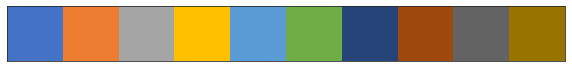

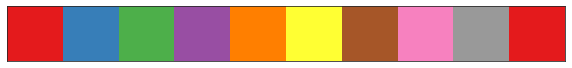

In [15]:
# Estilo de graficos
sns.set_style('white')
csfont = {'fontname':'Calibri'} # Fuente a utilizar

# Paleta de colores
my_palette = ['#4472C4', '#ED7D31', '#A5A5A5', '#FFC000', '#5B9BD5', '#70AD47', '#264478', '#9E480E', '#636363', '#997300'] # Excel color palette
my_palette2 = sns.color_palette('Set1', 10)
sns.palplot(sns.color_palette(my_palette, 10))
sns.palplot(sns.color_palette('Set1', 10))

# Define palette
sns.set_palette(my_palette2)

In [7]:
np.unique(df['Churn'])

array(['No', 'Yes'], dtype=object)

In [199]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [50]:
Weight_order_map = {'No': 0, 'Yes': 1}
df['Churn_label'] = df['Churn'].map(Weight_order_map)
df 

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_label
0,7590-VHVEG,1,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,5575-GNVDE,0,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,0
2,3668-QPYBK,0,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
3,7795-CFOCW,0,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0
4,9237-HQITU,1,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No,0
7039,2234-XADUH,1,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No,0
7040,4801-JZAZL,1,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,0
7041,8361-LTMKD,0,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes,1


In [9]:
# Ver estadistica descriptiva de variables de acuerdo a 'Churn'
df.groupby(['Churn']).agg({'MonthlyCharges': ['mean', 'min', 'max']})

MonthlyCharges               
                mean    min     max
Churn                              
No         61.265124  18.25  118.75
Yes        74.441332  18.85  118.35

In [201]:
a = df['Churn'].value_counts()
a

No     5174
Yes    1869
Name: Churn, dtype: int64

TypeError: can only concatenate str (not "int") to str

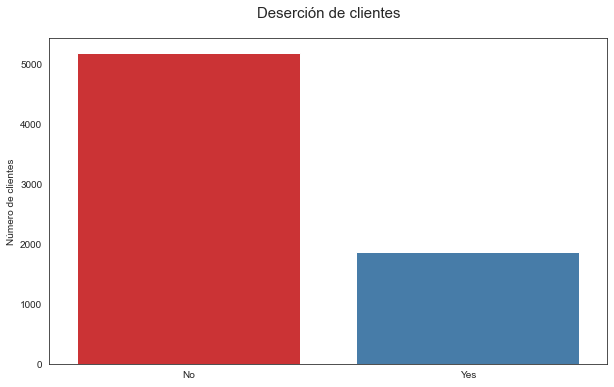

In [204]:
plt.figure(figsize=(10, 6))
p1=sns.barplot(x=['No', 'Yes'], y=[5174, 1869])
plt.title('Deserción de clientes', fontsize=15, pad=20)
plt.ylabel('Número de clientes')
plt.yticks(np.arange(0, max(df1)+1, 10000), fontsize=12)
plt.xlabel('Churn', fontsize=12, labelpad=15) 
plt.xticks(fontsize=12)
sns.despine(left=True, bottom=True)
p1.set_yticklabels('{:,.0f}'.format(x) for x in p1.get_yticks())

La mayoría de gente No ha desertado

In [11]:
# Proporcion de clientes por 'Churn'
round(df['Churn'].value_counts()/df.shape[0] * 100, 2)

No     73.46
Yes    26.54
Name: Churn, dtype: float64

Text(0.5, 1.0, 'MonthlyCharges')

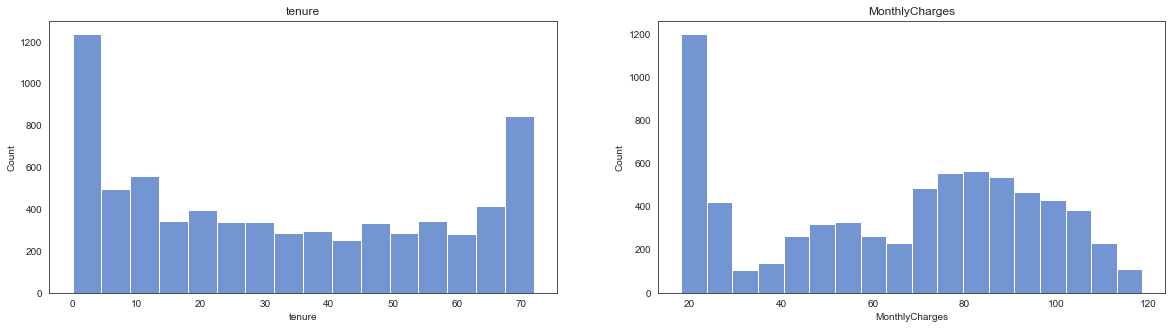

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5), sharex=False, sharey=False)

sns.histplot(df['tenure'], ax=axes[0])
axes[0].set_title('tenure')

sns.histplot(df['MonthlyCharges'], ax=axes[1])
axes[1].set_title('MonthlyCharges')

In [197]:
df1=df.groupby(['Churn'])[['MonthlyCharges']].mean()
df1=df1.reset_index()
df1.head()

,Churn,MonthlyCharges
0,No,61.265124
1,Yes,74.441332


TypeError: can only concatenate str (not "int") to str

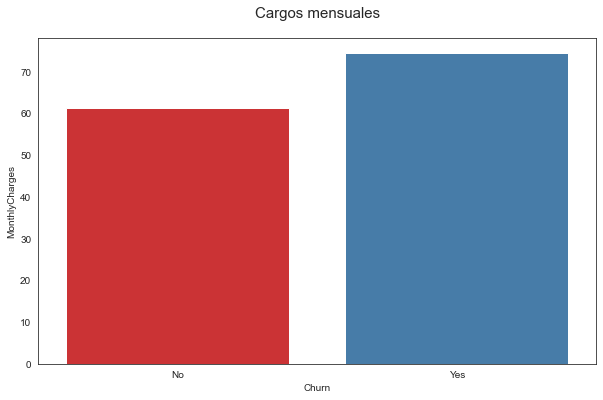

In [198]:
plt.figure(figsize=(10, 6))
p1=sns.barplot(data=df1, x='Churn', y='MonthlyCharges')
plt.title('Cargos mensuales', fontsize=15, pad=20)
plt.ylabel('MonthlyCharges')
plt.yticks(np.arange(0, max(df1)+1, 10000), fontsize=12)
plt.xlabel('Churn', fontsize=12, labelpad=15) 
plt.xticks(fontsize=12)
sns.despine(left=True, bottom=True)
p1.set_yticklabels('{:,.0f}'.format(x) for x in p1.get_yticks())

In [207]:
df1=df.groupby(['Churn'])[['tenure']].mean()
df1=df1.reset_index()
df1

,Churn,tenure
0,No,37.569965
1,Yes,17.979133


TypeError: can only concatenate str (not "int") to str

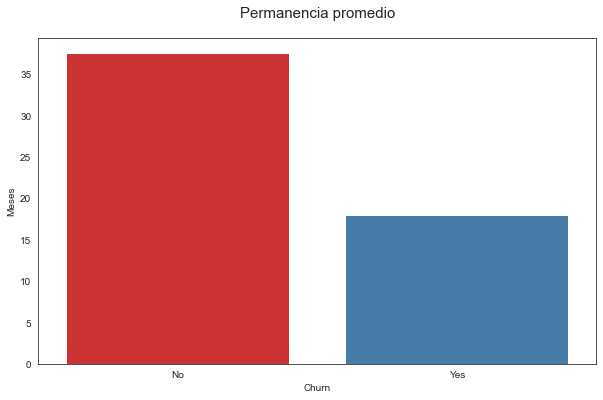

In [209]:
plt.figure(figsize=(10, 6))
p1=sns.barplot(data=df1, x='Churn', y='tenure')
plt.title('Permanencia promedio', fontsize=15, pad=20)
plt.ylabel('Meses')
plt.yticks(np.arange(0, max(df1)+1, 10000), fontsize=12)
plt.xlabel('Churn', fontsize=12, labelpad=15) 
plt.xticks(fontsize=12)
sns.despine(left=True, bottom=True)
p1.set_yticklabels('{:,.0f}'.format(x) for x in p1.get_yticks())

In [225]:
df2=df.groupby(['InternetService'])[['Churn']].agg()
df2=df2.reset_index()
df2.head()


TypeError: Must provide 'func' or tuples of '(column, aggfunc).

In [236]:
c1 = df['Churn_label']==1
c1.head()


0    False
1    False
2     True
3    False
4     True
Name: Churn_label, dtype: bool

In [238]:
c2 = df['Churn_label']==0
c2.head()

0     True
1     True
2    False
3     True
4    False
Name: Churn_label, dtype: bool

In [239]:
df3 = df[c1]
df4 = df[c2]


In [240]:
df3['InternetService'].value_counts()

Fiber optic    1297
DSL             459
No              113
Name: InternetService, dtype: int64

In [241]:
df4['InternetService'].value_counts()

DSL            1962
Fiber optic    1799
No             1413
Name: InternetService, dtype: int64

In [242]:
cross_int = pd.DataFrame()

In [243]:
cross_int['InternetService'] = None
cross_int['Clients'] = None
cross_int['Churn'] = None
cross_int

,InternetService,Clients,Churn


In [246]:
internet = ['DSL', 'Fiber optic', 'No', 'DSL', 'Fiber optic', 'No']
cross_int['InternetService'] = internet
desert = ['No', 'No', 'No', 'Yes', 'Yes', 'Yes']
cross_int['Churn'] = desert
num = [1962, 1799, 1413, 1297, 1799, 1413]
cross_int['Clients'] = num
cross_int

,InternetService,Clients,Churn
0,DSL,1962,No
1,Fiber optic,1799,No
2,No,1413,No
3,DSL,1297,Yes
4,Fiber optic,1799,Yes
5,No,1413,Yes


<AxesSubplot:>

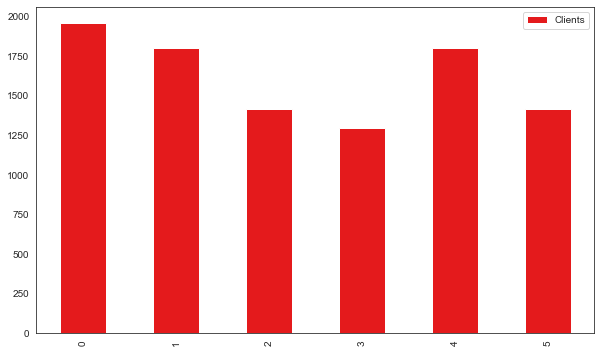

In [248]:
cross_int.plot(kind = 'bar',
                   stacked = True,
                   figsize = (10, 6))

[Text(0, 0.0, '0'),
 Text(0, 20000.0, '20,000'),
 Text(0, 40000.0, '40,000'),
 Text(0, 60000.0, '60,000'),
 Text(0, 80000.0, '80,000'),
 Text(0, 100000.0, '100,000'),
 Text(0, 120000.0, '120,000'),
 Text(0, 140000.0, '140,000'),
 Text(0, 160000.0, '160,000'),
 Text(0, 180000.0, '180,000'),
 Text(0, 200000.0, '200,000'),
 Text(0, 220000.0, '220,000')]

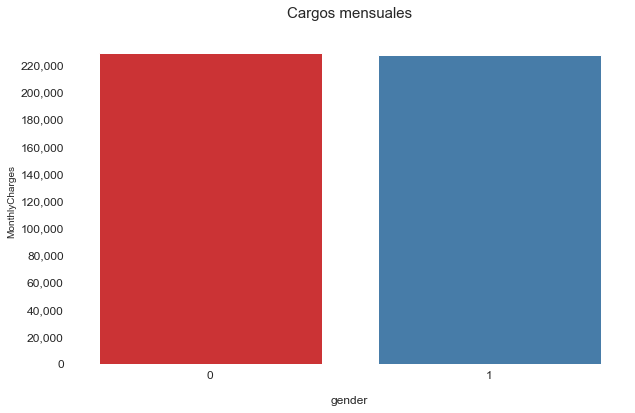

In [52]:
plt.figure(figsize=(10, 6))
p1=sns.barplot(data=df2, x='gender', y='MonthlyCharges')
plt.title('Cargos mensuales', fontsize=15, pad=20)
plt.ylabel('MonthlyCharges')
plt.yticks(np.arange(0, max(df2['MonthlyCharges'])+1, 20000), fontsize=12)
plt.xlabel('gender', fontsize=12, labelpad=15) 
plt.xticks(fontsize=12)
sns.despine(left=True, bottom=True)
p1.set_yticklabels('{:,.0f}'.format(x) for x in p1.get_yticks())

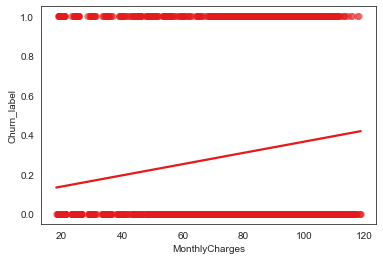

In [216]:
sns.regplot(x='MonthlyCharges', y='Churn_label', data=df, ci=None, scatter_kws={'alpha':0.3});

In [53]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_label
0,7590-VHVEG,1,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,5575-GNVDE,0,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,0
2,3668-QPYBK,0,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
3,7795-CFOCW,0,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0
4,9237-HQITU,1,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1


In [54]:
df['gender'] = pd.get_dummies(df['gender'])
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_label
0,7590-VHVEG,0,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,5575-GNVDE,1,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,0
2,3668-QPYBK,1,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
3,7795-CFOCW,1,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0
4,9237-HQITU,0,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1


In [55]:
y = df.loc[:, 'Churn_label']
y.shape

(7043,)

In [80]:
X = df.loc[:, df.columns != 'Churn_label']

In [81]:
X = df.loc[:, df.columns != 'Churn_label']

In [82]:
X = X.drop(['customerID', 'Churn'], axis = 1)

In [83]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,Yes,No,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,1,0,No,No,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5
2,1,0,No,No,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,1,0,No,No,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,0,0,No,No,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


In [84]:
X['Partner'].unique()

array(['Yes', 'No'], dtype=object)

In [85]:
X['Partner'] = pd.get_dummies(X['Partner'])
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,0,No,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,1,0,1,No,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5
2,1,0,1,No,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,1,0,1,No,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,0,0,1,No,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


In [86]:
X['Dependents'].unique()

array(['No', 'Yes'], dtype=object)

In [87]:
X['Dependents'] = pd.get_dummies(X['Dependents'])
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,0,1,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,1,0,1,1,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5
2,1,0,1,1,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,1,0,1,1,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,0,0,1,1,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


In [88]:
X['PhoneService'].unique()

array([0, 1])

In [89]:
df['PhoneService'] = df['PhoneService'].map({'No': 0, 'Yes': 1})
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_label
0,7590-VHVEG,0,0,Yes,No,1,NaN,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,5575-GNVDE,1,0,No,No,34,NaN,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,0
2,3668-QPYBK,1,0,No,No,2,NaN,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
3,7795-CFOCW,1,0,No,No,45,NaN,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0
4,9237-HQITU,0,0,No,No,2,NaN,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1


In [90]:
X['MultipleLines'].unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

In [91]:
pd.get_dummies(X['MultipleLines'])

,No,No phone service,Yes
0,0,1,0
1,1,0,0
2,1,0,0
3,0,1,0
4,1,0,0
...,...,...,...
7038,0,0,1
7039,0,0,1
7040,0,1,0
7041,0,0,1


In [92]:
gen_onehot_features = pd.get_dummies(X['MultipleLines'])
gen_onehot_features.columns = ['No phone service', 'No', 'Yes']
X = pd.concat([X, gen_onehot_features], axis=1)

In [93]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,No phone service,No,Yes
0,0,0,0,1,1,0,No phone service,DSL,No,Yes,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1,0
1,1,0,1,1,34,1,No,DSL,Yes,No,...,No,No,One year,No,Mailed check,56.95,1889.5,1,0,0
2,1,0,1,1,2,1,No,DSL,Yes,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,0,0
3,1,0,1,1,45,0,No phone service,DSL,Yes,No,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,1,0
4,0,0,1,1,2,1,No,Fiber optic,No,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,0,0


In [94]:
X.drop(columns=['MultipleLines'])

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,No phone service,No,Yes
0,0,0,0,1,1,0,DSL,No,Yes,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1,0
1,1,0,1,1,34,1,DSL,Yes,No,Yes,...,No,No,One year,No,Mailed check,56.95,1889.5,1,0,0
2,1,0,1,1,2,1,DSL,Yes,Yes,No,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,0,0
3,1,0,1,1,45,0,DSL,Yes,No,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,1,0
4,0,0,1,1,2,1,Fiber optic,No,No,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,0,0,24,1,DSL,Yes,No,Yes,...,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,0,0,1
7039,0,0,0,0,72,1,Fiber optic,No,Yes,Yes,...,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,0,0,1
7040,0,0,0,0,11,0,DSL,Yes,No,No,...,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0,1,0
7041,1,1,0,1,4,1,Fiber optic,No,No,No,...,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,0,0,1


In [107]:
X.rename(columns={'No': 'Multi_lines_no', 'Yes': 'Multi_lines_yes'}, inplace = True)

In [108]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,No phone service,Multi_lines_no,Multi_lines_yes
0,0,0,0,1,1,0,DSL,No,Yes,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1,0
1,1,0,1,1,34,1,DSL,Yes,No,Yes,...,No,No,One year,No,Mailed check,56.95,1889.5,1,0,0
2,1,0,1,1,2,1,DSL,Yes,Yes,No,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,0,0
3,1,0,1,1,45,0,DSL,Yes,No,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,1,0
4,0,0,1,1,2,1,Fiber optic,No,No,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,0,0


In [105]:
X.drop(columns = ['MultipleLines'], axis = 1, inplace = True)

KeyError: "['MultipleLines'] not found in axis"

In [110]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,No phone service,Multi_lines_no,Multi_lines_yes
0,0,0,0,1,1,0,DSL,No,Yes,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1,0
1,1,0,1,1,34,1,DSL,Yes,No,Yes,...,No,No,One year,No,Mailed check,56.95,1889.5,1,0,0
2,1,0,1,1,2,1,DSL,Yes,Yes,No,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,0,0
3,1,0,1,1,45,0,DSL,Yes,No,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,1,0
4,0,0,1,1,2,1,Fiber optic,No,No,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,0,0


In [111]:
X['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [112]:
gen_onehot_features = pd.get_dummies(X['InternetService'])
gen_onehot_features.columns = ['DSL', 'Fiber optic', 'No']
X = pd.concat([X, gen_onehot_features], axis=1)

In [114]:
X.drop(columns=['InternetService'], inplace=True)

In [115]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,No phone service,Multi_lines_no,Multi_lines_yes,DSL,Fiber optic,No
0,0,0,0,1,1,0,No,Yes,No,No,...,Yes,Electronic check,29.85,29.85,0,1,0,1,0,0
1,1,0,1,1,34,1,Yes,No,Yes,No,...,No,Mailed check,56.95,1889.5,1,0,0,1,0,0
2,1,0,1,1,2,1,Yes,Yes,No,No,...,Yes,Mailed check,53.85,108.15,1,0,0,1,0,0
3,1,0,1,1,45,0,Yes,No,Yes,Yes,...,No,Bank transfer (automatic),42.30,1840.75,0,1,0,1,0,0
4,0,0,1,1,2,1,No,No,No,No,...,Yes,Electronic check,70.70,151.65,1,0,0,0,1,0


In [116]:
X.rename(columns={'No': 'InternetService_no'}, inplace = True)

In [117]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,No phone service,Multi_lines_no,Multi_lines_yes,DSL,Fiber optic,InternetService_no
0,0,0,0,1,1,0,No,Yes,No,No,...,Yes,Electronic check,29.85,29.85,0,1,0,1,0,0
1,1,0,1,1,34,1,Yes,No,Yes,No,...,No,Mailed check,56.95,1889.5,1,0,0,1,0,0
2,1,0,1,1,2,1,Yes,Yes,No,No,...,Yes,Mailed check,53.85,108.15,1,0,0,1,0,0
3,1,0,1,1,45,0,Yes,No,Yes,Yes,...,No,Bank transfer (automatic),42.30,1840.75,0,1,0,1,0,0
4,0,0,1,1,2,1,No,No,No,No,...,Yes,Electronic check,70.70,151.65,1,0,0,0,1,0


In [119]:
X['OnlineSecurity'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [122]:
X['OnlineSecurity'] = pd.get_dummies(X['OnlineSecurity'])

In [126]:
X['OnlineBackup'].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [127]:
gen_onehot_features = pd.get_dummies(X['OnlineBackup'])
gen_onehot_features.columns = ['Yes', 'No', 'No internet service']
X = pd.concat([X, gen_onehot_features], axis=1)

In [129]:
X.rename(columns={'Yes': 'OnlineBackup_yes', 'No': 'OnlineBackup_no', 'No internet service': 'borrar'}, inplace = True)
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,TotalCharges,No phone service,Multi_lines_no,Multi_lines_yes,DSL,Fiber optic,InternetService_no,OnlineBackup_yes,OnlineBackup_no,borrar
0,0,0,0,1,1,0,1,Yes,No,No,...,29.85,0,1,0,1,0,0,0,0,1
1,1,0,1,1,34,1,0,No,Yes,No,...,1889.5,1,0,0,1,0,0,1,0,0
2,1,0,1,1,2,1,0,Yes,No,No,...,108.15,1,0,0,1,0,0,0,0,1
3,1,0,1,1,45,0,0,No,Yes,Yes,...,1840.75,0,1,0,1,0,0,1,0,0
4,0,0,1,1,2,1,1,No,No,No,...,151.65,1,0,0,0,1,0,1,0,0


In [131]:
X.drop(columns = ['borrar'], inplace = True)
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,MonthlyCharges,TotalCharges,No phone service,Multi_lines_no,Multi_lines_yes,DSL,Fiber optic,InternetService_no,OnlineBackup_yes,OnlineBackup_no
0,0,0,0,1,1,0,1,Yes,No,No,...,29.85,29.85,0,1,0,1,0,0,0,0
1,1,0,1,1,34,1,0,No,Yes,No,...,56.95,1889.5,1,0,0,1,0,0,1,0
2,1,0,1,1,2,1,0,Yes,No,No,...,53.85,108.15,1,0,0,1,0,0,0,0
3,1,0,1,1,45,0,0,No,Yes,Yes,...,42.30,1840.75,0,1,0,1,0,0,1,0
4,0,0,1,1,2,1,1,No,No,No,...,70.70,151.65,1,0,0,0,1,0,1,0


In [132]:
X.drop(columns = ['OnlineBackup'], inplace = True)
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,DeviceProtection,TechSupport,StreamingTV,...,MonthlyCharges,TotalCharges,No phone service,Multi_lines_no,Multi_lines_yes,DSL,Fiber optic,InternetService_no,OnlineBackup_yes,OnlineBackup_no
0,0,0,0,1,1,0,1,No,No,No,...,29.85,29.85,0,1,0,1,0,0,0,0
1,1,0,1,1,34,1,0,Yes,No,No,...,56.95,1889.5,1,0,0,1,0,0,1,0
2,1,0,1,1,2,1,0,No,No,No,...,53.85,108.15,1,0,0,1,0,0,0,0
3,1,0,1,1,45,0,0,Yes,Yes,No,...,42.30,1840.75,0,1,0,1,0,0,1,0
4,0,0,1,1,2,1,1,No,No,No,...,70.70,151.65,1,0,0,0,1,0,1,0


In [133]:
X['DeviceProtection'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [134]:
gen_onehot_features = pd.get_dummies(X['DeviceProtection'])
gen_onehot_features.columns = ['No', 'Yes', 'No internet service']
X = pd.concat([X, gen_onehot_features], axis=1)

In [135]:
X.rename(columns={'Yes': 'DeviceProtection_yes', 'No': 'DeviceProtection_no', 'No internet service': 'borrar'}, inplace = True)
X.drop(columns = ['borrar'], inplace = True)
X.drop(columns = ['DeviceProtection'], inplace = True)
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,TechSupport,StreamingTV,StreamingMovies,...,No phone service,Multi_lines_no,Multi_lines_yes,DSL,Fiber optic,InternetService_no,OnlineBackup_yes,OnlineBackup_no,DeviceProtection_no,DeviceProtection_yes
0,0,0,0,1,1,0,1,No,No,No,...,0,1,0,1,0,0,0,0,1,0
1,1,0,1,1,34,1,0,No,No,No,...,1,0,0,1,0,0,1,0,0,0
2,1,0,1,1,2,1,0,No,No,No,...,1,0,0,1,0,0,0,0,1,0
3,1,0,1,1,45,0,0,Yes,No,No,...,0,1,0,1,0,0,1,0,0,0
4,0,0,1,1,2,1,1,No,No,No,...,1,0,0,0,1,0,1,0,1,0


In [138]:
X['TechSupport'] = pd.get_dummies(X['TechSupport'])
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,TechSupport,StreamingTV,StreamingMovies,...,No phone service,Multi_lines_no,Multi_lines_yes,DSL,Fiber optic,InternetService_no,OnlineBackup_yes,OnlineBackup_no,DeviceProtection_no,DeviceProtection_yes
0,0,0,0,1,1,0,1,1,No,No,...,0,1,0,1,0,0,0,0,1,0
1,1,0,1,1,34,1,0,1,No,No,...,1,0,0,1,0,0,1,0,0,0
2,1,0,1,1,2,1,0,1,No,No,...,1,0,0,1,0,0,0,0,1,0
3,1,0,1,1,45,0,0,0,No,No,...,0,1,0,1,0,0,1,0,0,0
4,0,0,1,1,2,1,1,1,No,No,...,1,0,0,0,1,0,1,0,1,0


In [139]:
X['StreamingTV'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [140]:
X['StreamingTV'] = pd.get_dummies(X['StreamingTV'])
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,TechSupport,StreamingTV,StreamingMovies,...,No phone service,Multi_lines_no,Multi_lines_yes,DSL,Fiber optic,InternetService_no,OnlineBackup_yes,OnlineBackup_no,DeviceProtection_no,DeviceProtection_yes
0,0,0,0,1,1,0,1,1,1,No,...,0,1,0,1,0,0,0,0,1,0
1,1,0,1,1,34,1,0,1,1,No,...,1,0,0,1,0,0,1,0,0,0
2,1,0,1,1,2,1,0,1,1,No,...,1,0,0,1,0,0,0,0,1,0
3,1,0,1,1,45,0,0,0,1,No,...,0,1,0,1,0,0,1,0,0,0
4,0,0,1,1,2,1,1,1,1,No,...,1,0,0,0,1,0,1,0,1,0


In [141]:
X['StreamingMovies'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [142]:
X['StreamingMovies'] = pd.get_dummies(X['StreamingMovies'])
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,TechSupport,StreamingTV,StreamingMovies,...,No phone service,Multi_lines_no,Multi_lines_yes,DSL,Fiber optic,InternetService_no,OnlineBackup_yes,OnlineBackup_no,DeviceProtection_no,DeviceProtection_yes
0,0,0,0,1,1,0,1,1,1,1,...,0,1,0,1,0,0,0,0,1,0
1,1,0,1,1,34,1,0,1,1,1,...,1,0,0,1,0,0,1,0,0,0
2,1,0,1,1,2,1,0,1,1,1,...,1,0,0,1,0,0,0,0,1,0
3,1,0,1,1,45,0,0,0,1,1,...,0,1,0,1,0,0,1,0,0,0
4,0,0,1,1,2,1,1,1,1,1,...,1,0,0,0,1,0,1,0,1,0


In [143]:
X['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [145]:
gen_onehot_features = pd.get_dummies(X['Contract'])
gen_onehot_features.columns = ['Month-to-month', 'One year', 'Two year']
X = pd.concat([X, gen_onehot_features], axis=1)
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,TechSupport,StreamingTV,StreamingMovies,...,DSL,Fiber optic,InternetService_no,OnlineBackup_yes,OnlineBackup_no,DeviceProtection_no,DeviceProtection_yes,Month-to-month,One year,Two year
0,0,0,0,1,1,0,1,1,1,1,...,1,0,0,0,0,1,0,1,0,0
1,1,0,1,1,34,1,0,1,1,1,...,1,0,0,1,0,0,0,0,1,0
2,1,0,1,1,2,1,0,1,1,1,...,1,0,0,0,0,1,0,1,0,0
3,1,0,1,1,45,0,0,0,1,1,...,1,0,0,1,0,0,0,0,1,0
4,0,0,1,1,2,1,1,1,1,1,...,0,1,0,1,0,1,0,1,0,0


In [146]:
X['PaperlessBilling'].unique()

array(['Yes', 'No'], dtype=object)

In [147]:
X['PaperlessBilling'] = pd.get_dummies(X['PaperlessBilling'])

In [148]:
X['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [149]:
gen_onehot_features = pd.get_dummies(X['PaymentMethod'])
gen_onehot_features.columns = ['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)']
X = pd.concat([X, gen_onehot_features], axis=1)
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,TechSupport,StreamingTV,StreamingMovies,...,OnlineBackup_no,DeviceProtection_no,DeviceProtection_yes,Month-to-month,One year,Two year,Electronic check,Mailed check,Bank transfer (automatic),Credit card (automatic)
0,0,0,0,1,1,0,1,1,1,1,...,0,1,0,1,0,0,0,0,1,0
1,1,0,1,1,34,1,0,1,1,1,...,0,0,0,0,1,0,0,0,0,1
2,1,0,1,1,2,1,0,1,1,1,...,0,1,0,1,0,0,0,0,0,1
3,1,0,1,1,45,0,0,0,1,1,...,0,0,0,0,1,0,1,0,0,0
4,0,0,1,1,2,1,1,1,1,1,...,0,1,0,1,0,0,0,0,1,0


In [151]:
X.drop(columns = ['Contract', 'PaymentMethod'], inplace = True)

In [152]:
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,TechSupport,StreamingTV,StreamingMovies,...,OnlineBackup_no,DeviceProtection_no,DeviceProtection_yes,Month-to-month,One year,Two year,Electronic check,Mailed check,Bank transfer (automatic),Credit card (automatic)
0,0,0,0,1,1,0,1,1,1,1,...,0,1,0,1,0,0,0,0,1,0
1,1,0,1,1,34,1,0,1,1,1,...,0,0,0,0,1,0,0,0,0,1
2,1,0,1,1,2,1,0,1,1,1,...,0,1,0,1,0,0,0,0,0,1
3,1,0,1,1,45,0,0,0,1,1,...,0,0,0,0,1,0,1,0,0,0
4,0,0,1,1,2,1,1,1,1,1,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,0,0,24,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
7039,0,0,0,0,72,1,1,1,0,0,...,0,0,0,0,1,0,0,1,0,0
7040,0,0,0,0,11,0,0,1,1,1,...,0,1,0,1,0,0,0,0,1,0
7041,1,1,0,1,4,1,1,1,1,1,...,0,1,0,1,0,0,0,0,0,1


In [160]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   gender                     7043 non-null   uint8  
 1   SeniorCitizen              7043 non-null   int64  
 2   Partner                    7043 non-null   uint8  
 3   Dependents                 7043 non-null   uint8  
 4   tenure                     7043 non-null   int64  
 5   PhoneService               7043 non-null   int64  
 6   OnlineSecurity             7043 non-null   uint8  
 7   TechSupport                7043 non-null   uint8  
 8   StreamingTV                7043 non-null   uint8  
 9   StreamingMovies            7043 non-null   uint8  
 10  PaperlessBilling           7043 non-null   uint8  
 11  MonthlyCharges             7043 non-null   float64
 12  TotalCharges               7043 non-null   object 
 13  No phone service           7043 non-null   uint8

In [161]:
X['TotalCharges'] = pd.to_numeric(X['TotalCharges'],errors = 'coerce')
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   gender                     7043 non-null   uint8  
 1   SeniorCitizen              7043 non-null   int64  
 2   Partner                    7043 non-null   uint8  
 3   Dependents                 7043 non-null   uint8  
 4   tenure                     7043 non-null   int64  
 5   PhoneService               7043 non-null   int64  
 6   OnlineSecurity             7043 non-null   uint8  
 7   TechSupport                7043 non-null   uint8  
 8   StreamingTV                7043 non-null   uint8  
 9   StreamingMovies            7043 non-null   uint8  
 10  PaperlessBilling           7043 non-null   uint8  
 11  MonthlyCharges             7043 non-null   float64
 12  TotalCharges               7032 non-null   float64
 13  No phone service           7043 non-null   uint8

In [166]:
X.fillna(X.mean(), inplace = True)

In [167]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   gender                     7043 non-null   uint8  
 1   SeniorCitizen              7043 non-null   int64  
 2   Partner                    7043 non-null   uint8  
 3   Dependents                 7043 non-null   uint8  
 4   tenure                     7043 non-null   int64  
 5   PhoneService               7043 non-null   int64  
 6   OnlineSecurity             7043 non-null   uint8  
 7   TechSupport                7043 non-null   uint8  
 8   StreamingTV                7043 non-null   uint8  
 9   StreamingMovies            7043 non-null   uint8  
 10  PaperlessBilling           7043 non-null   uint8  
 11  MonthlyCharges             7043 non-null   float64
 12  TotalCharges               7043 non-null   float64
 13  No phone service           7043 non-null   uint8

In [154]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import cross_validate

from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, plot_roc_curve

In [168]:
# División entrenamiento prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

In [158]:
import statsmodels.api as sm
from sklearn import linear_model

In [169]:
lm = linear_model.LogisticRegression()
lm.fit(X_train, y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [170]:
probs = lm.predict_proba(X_test)

In [171]:
probs

array([[0.44633651, 0.55366349],
       [0.65776838, 0.34223162],
       [0.23073398, 0.76926602],
       ...,
       [0.96385593, 0.03614407],
       [0.77279865, 0.22720135],
       [0.88814584, 0.11185416]])

In [172]:
prediction = lm.predict(X_test)

In [252]:
predictiontrain = lm.predict(X_train)

In [173]:
prob = probs[:,1]
prob_df = pd.DataFrame(prob)
threshold = 0.1
prob_df["prediction"] = np.where(prob_df[0]>threshold, 1, 0)
prob_df.head()

,0,prediction
0,0.553663,1
1,0.342232,1
2,0.769266,1
3,0.620998,1
4,0.013626,0


In [174]:
pd.crosstab(prob_df.prediction, columns="count")

col_0,count
prediction,
0,673
1,1088


In [175]:
1088/len(prob_df)*100

61.78307779670642

In [176]:
threshold = 0.05
prob_df["prediction"] = np.where(prob_df[0]>threshold, 1, 0)
pd.crosstab(prob_df.prediction, columns="count")

col_0,count
prediction,
0,455
1,1306


In [177]:
1306/len(prob_df)*100

74.16240772288472

In [179]:
metrics.accuracy_score(y_test, prediction)

0.8097671777399205

In [253]:
metrics.accuracy_score(y_train, predictiontrain)

0.80367285119273

In [249]:
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(y_test,prediction)
print(cm1)

[[1190  114]
 [ 221  236]]


In [270]:
cm1 = [[0.67, 0.061], [0.125, 0.134]]
cm1

[[0.67, 0.061], [0.125, 0.134]]

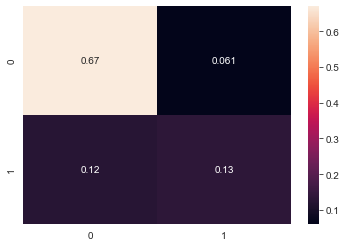

In [271]:
import seaborn as sn
sn.heatmap(cm1, annot=True)
plt.show()

In [254]:
cm2=confusion_matrix(y_train,predictiontrain)
print(cm2)

[[3488  382]
 [ 655  757]]


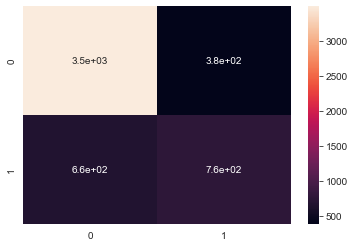

In [255]:
sn.heatmap(cm2, annot=True)
plt.show()

In [256]:
TN=cm1[0][0]
TP=cm1[1][1]
FN=cm1[0][1]
FP=cm1[1][0]

In [257]:
sens = TP/(TP+FN)
sens

0.6742857142857143

In [258]:
espc_1 = 1-TN/(TN+FP)
espc_1

0.15662650602409633

## Random Forest 

In [259]:
def model_class(model, X_train, X_test, y_train, y_test, method):
  np.random.seed(2731) # seed

  # Estimation
  model.fit(X_train, y_train)
  
  # Prediction
  df_train_yhat=model.predict(X_train)
  df_test_yhat=model.predict(X_test)

  # Metrics
  DeterCoef_train=model.score(X_train, y_train)
  DeterCoef_test=model.score(X_test, y_test)

  RMSE_train=np.sqrt(metrics.mean_squared_error(y_train, df_train_yhat))
  RMSE_test=np.sqrt(metrics.mean_squared_error(y_test, df_test_yhat))

  # Results
  print(f'\nModel Report\n{method}\n')
  
  print(f'Determination Coefficient (Train): {DeterCoef_train:.4f}')
  print(f'Determination Coefficient (Test): {DeterCoef_test:.4f}')

  print(f'RMSE (Train): {RMSE_train:.4f}')
  print(f'RMSE (Test): {RMSE_test:.4f}')

In [260]:
# División entrenamiento prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

In [183]:
# Estandarizar para el uso en los modelos de regresion logistica y KNN
X_std_train = X_train
X_std_test = X_test

In [261]:
# Estandarizar datos
scaler = StandardScaler()
# Ajustar con base en el conjunto de entrenamiento
scaler.fit(X_std_train)
# Aplicar la transformacion a los conjuntos de entrenamiento y prueba
X_std_train = scaler.transform(X_std_train)
X_std_test = scaler.transform(X_std_test)

In [262]:
# Lista de valores para probar el parametro n_estimators
estimator_range = [1] + list(range(10, 210, 10))
np.array(estimator_range)

array([  1,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
       130, 140, 150, 160, 170, 180, 190, 200])

In [263]:
# Lista para almacenar los scores para cada valor de n_estimators
scores = []
for estimator in estimator_range:
  rfor_class = RandomForestClassifier(n_estimators = estimator, bootstrap = True, random_state = 2731)
  rfor_class.fit(X_train, y_train)
  score = rfor_class.score(X_test, y_test)
  scores.append(score)

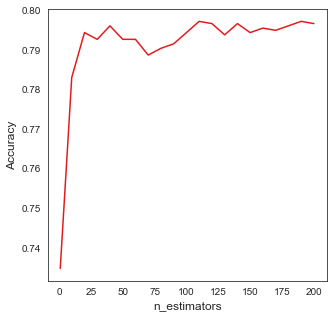

In [264]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (5, 5))
axes.plot(estimator_range, scores)
axes.set_xlabel('n_estimators', fontsize = 12)
axes.set_ylabel('Accuracy', fontsize = 12);

In [265]:
max_value=max(scores)
max_index=scores.index(max_value)

print(max_value)
print(max_index)
print(estimator_range[max_index])


0.797274275979557
11
110


In [266]:
# Estimacion 
rfor_class = RandomForestClassifier(n_estimators = 110,
                                    bootstrap = True,
                                    random_state = 2731)

model_class(rfor_class, X_train, X_test, y_train, y_test, 'Random Forest Classifier')


Model Report
Random Forest Classifier

Determination Coefficient (Train): 0.9970
Determination Coefficient (Test): 0.7973
RMSE (Train): 0.0550
RMSE (Test): 0.4503


In [191]:
score = rfor_class.score(X_test, y_test)
score

0.797274275979557

In [210]:
score = rfor_class.score(X_train, y_train)
score

0.9969708443771299

In [192]:
model_class(rfor_class, X_train, X_test, y_train, y_test, 'Random Forest Classifier')


Model Report
Random Forest Classifier

Determination Coefficient (Train): 0.9970
Determination Coefficient (Test): 0.7973
RMSE (Train): 0.0550
RMSE (Test): 0.4503


In [193]:
list(zip(X.columns, rfor_class.feature_importances_))

[('gender', 0.027775683360489658),
 ('SeniorCitizen', 0.02085834764076217),
 ('Partner', 0.02266818780857239),
 ('Dependents', 0.019594903047460265),
 ('tenure', 0.15714501158839872),
 ('PhoneService', 0.0034433184724449338),
 ('OnlineSecurity', 0.036979665939721684),
 ('TechSupport', 0.029178272436435906),
 ('StreamingTV', 0.018154789963751986),
 ('StreamingMovies', 0.017386389641008942),
 ('PaperlessBilling', 0.025651557250043238),
 ('MonthlyCharges', 0.15988130419846394),
 ('TotalCharges', 0.17777561581457904),
 ('No phone service', 0.013410605304529028),
 ('Multi_lines_no', 0.0040378240705436375),
 ('Multi_lines_yes', 0.013324680380718141),
 ('DSL', 0.014506173661867025),
 ('Fiber optic', 0.028664501514617576),
 ('InternetService_no', 0.004536898175872773),
 ('OnlineBackup_yes', 0.02590669059259766),
 ('OnlineBackup_no', 0.004525376334634216),
 ('DeviceProtection_no', 0.021132297032098506),
 ('DeviceProtection_yes', 0.004250671524895153),
 ('Month-to-month', 0.058594096838992575),


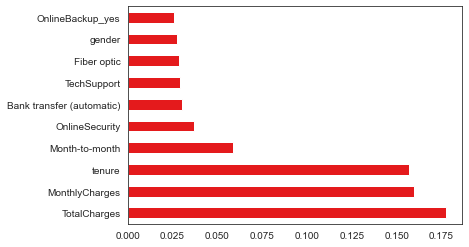

In [196]:
feat_importances = pd.Series(rfor_class.feature_importances_, index = X.columns)

# Grafico
feat_importances.nlargest(10).plot(kind = 'barh');

<ipython-input-273-66dd373c8a42>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  p1.set_xticklabels('{:,.0f}'.format(x) for x in p1.get_xticks())


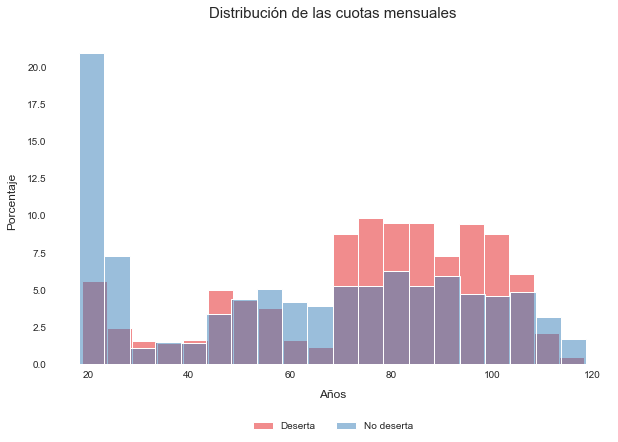

In [273]:
p1=sns.histplot(data = df[df['Churn_label'] == 1], x = 'MonthlyCharges', stat = 'percent', bins = 20, color = my_palette2[0], alpha = 0.5, label = 'Deserta')
p2=sns.histplot(data = df[df['Churn_label'] == 0], x = 'MonthlyCharges', stat = 'percent', bins = 20, color = my_palette2[1], alpha = 0.5, label = 'No deserta')

plt.title('Distribución de las cuotas mensuales', fontsize = 15, pad = 20)
plt.legend(title = None,
           loc = 'upper center',
           bbox_to_anchor = (0.5, -0.15),
           ncol = 3,
           frameon = False)
plt.ylabel('Porcentaje', fontsize = 12, labelpad = 10)
plt.xlabel('Años', fontsize = 12, labelpad = 10)
p1.set_xticklabels('{:,.0f}'.format(x) for x in p1.get_xticks())
sns.despine(left = True, bottom = True)
plt.gcf().set_size_inches(10 ,6);